### Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
 column_titles = ['symboling', 'norm_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 
    'body_style', 'drive_wheels', 'engine_loc', 'wheel_base', 'length', 'width',
    'height', 'curb_weight', 'engine_type', 'num_of_cylin', 'engine_size', 'fuel_sys',
    'bore', 'stroke', 'compress_ratio', 'HP', 'peak_rpm', 'city_mpg', 'hw_mpg', 'price']
predictors = ['num_of_doors', 'body_style', 'drive_wheels', 'length','curb_weight','HP','peak_rpm','city_mpg','hw_mpg']
response = ['price']

### Read the Data

In [3]:
df = pd.read_csv('imports-85.data', names = column_titles)
df_cars = df[predictors + response]

### Review Data Structure

<p>Notice that several numeric variables are registering as objects.  In additions several rows have '?' in the data.  Those rows will be dropped</p>

In [4]:
df_cars

,num_of_doors,body_style,drive_wheels,length,curb_weight,HP,peak_rpm,city_mpg,hw_mpg,price
0,two,convertible,rwd,168.8,2548,111,5000,21,27,13495
1,two,convertible,rwd,168.8,2548,111,5000,21,27,16500
2,two,hatchback,rwd,171.2,2823,154,5000,19,26,16500
3,four,sedan,fwd,176.6,2337,102,5500,24,30,13950
4,four,sedan,4wd,176.6,2824,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...
200,four,sedan,rwd,188.8,2952,114,5400,23,28,16845
201,four,sedan,rwd,188.8,3049,160,5300,19,25,19045
202,four,sedan,rwd,188.8,3012,134,5500,18,23,21485
203,four,sedan,rwd,188.8,3217,106,4800,26,27,22470


In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_of_doors  205 non-null    object 
 1   body_style    205 non-null    object 
 2   drive_wheels  205 non-null    object 
 3   length        205 non-null    float64
 4   curb_weight   205 non-null    int64  
 5   HP            205 non-null    object 
 6   peak_rpm      205 non-null    object 
 7   city_mpg      205 non-null    int64  
 8   hw_mpg        205 non-null    int64  
 9   price         205 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 11.3+ KB


### Clean the Data

#### 1.) Drop Null Values
#### 2.) Adjust Variables Type
#### 3.) Drop Outliers

In [6]:
# 1. Drop Null Values
indexes_to_drop = list(df_cars.loc[df_cars.HP == '?'].index)
df_cars = df_cars.drop(index=indexes_to_drop)
indexes_to_drop = list(df_cars.loc[df_cars.price == '?'].index)
df_cars = df_cars.drop(index=indexes_to_drop)
indexes_to_drop = list(df_cars.loc[df_cars.num_of_doors == '?'].index)
df_cars = df_cars.drop(index=indexes_to_drop)
# 2. Adjust Variables Type
df_cars['HP'] = df_cars['HP'].astype(int)
df_cars['peak_rpm'] = df_cars['peak_rpm'].astype(int)
df_cars['price'] = df_cars['price'].astype(int)

In [7]:
df_cars.describe()

,length,curb_weight,HP,peak_rpm,city_mpg,hw_mpg,price
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,174.218274,2558.456853,103.604061,5118.020305,25.152284,30.629442,13279.644670
std,12.373547,521.782047,37.639205,481.035914,6.437863,6.836259,8010.334218
min,141.100000,1488.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,166.800000,2145.000000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,173.200000,2414.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,183.500000,2935.000000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,208.100000,4066.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Review the Data Set

#### 1.) Review Histograms
#### 2.) Drop Outliers
#### 3.) Look for Correlations
#### 4.) Drop Highly Correlated Predictors

#### 1. Review the histograms

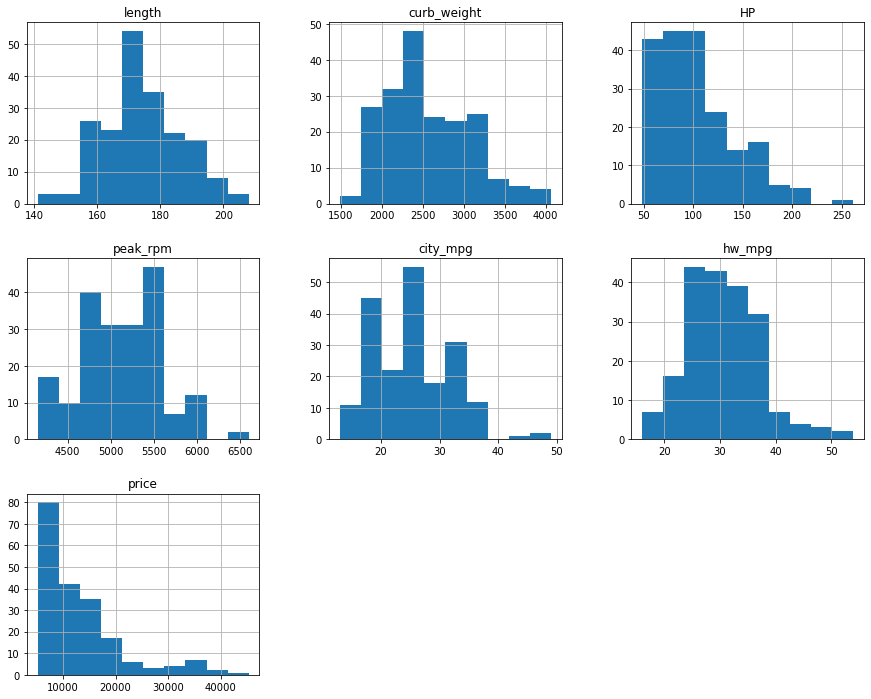

In [8]:
df_cars.hist(bins=10,figsize=(15,12))
plt.show()

<p> The histograms review that the scales of the predictors from 0-50 on the low side to 4500-6500.  Machine Learning models work best with scaled data.  Therefore this data will need to be scaled.  In addition 75% of the response values are \$16,500 or less.  There are 17 response values above \$25,000.  To improve the accuracy of the model, those 17 outliers are dropped.</p>

In [9]:
# 2. Drop Outliers
df_cars.drop((df_cars[df_cars['price'] > 20000]).index,inplace=True)

#### 3. Look for Correlations

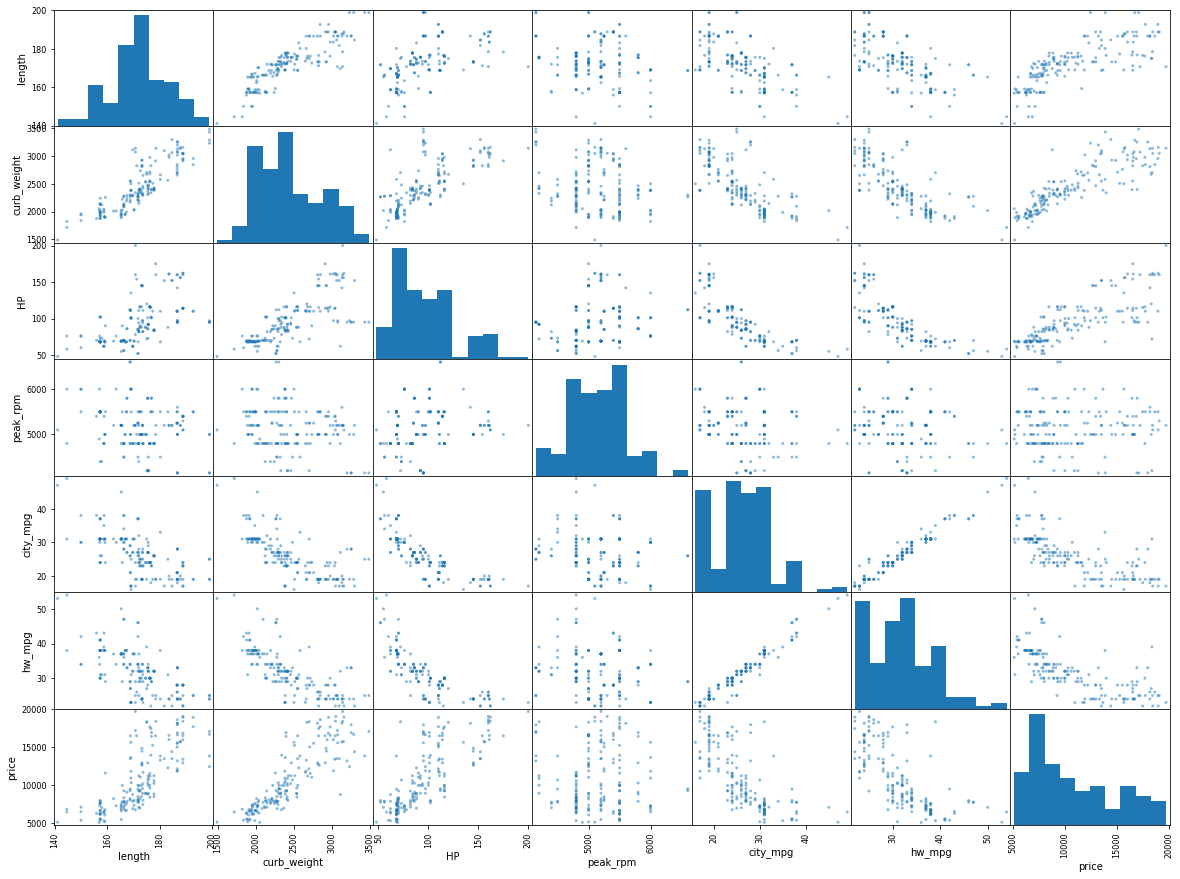

In [10]:
scatter_matrix(df_cars,figsize=(20,15))
plt.show()

In [11]:
df_cars.corr()

,length,curb_weight,HP,peak_rpm,city_mpg,hw_mpg,price
length,1.000000,0.865618,0.557843,-0.215307,-0.641124,-0.647871,0.752412
curb_weight,0.865618,1.000000,0.736740,-0.213186,-0.731506,-0.753842,0.858203
HP,0.557843,0.736740,1.000000,0.151838,-0.804148,-0.789978,0.777639
peak_rpm,-0.215307,-0.213186,0.151838,1.000000,-0.171721,-0.142506,-0.016600
city_mpg,-0.641124,-0.731506,-0.804148,-0.171721,1.000000,0.973393,-0.725591
hw_mpg,-0.647871,-0.753842,-0.789978,-0.142506,0.973393,1.000000,-0.716977
price,0.752412,0.858203,0.777639,-0.016600,-0.725591,-0.716977,1.000000


<p>The above plot and correlation matrix reveals a great deal of correlation among the predictors.  The collinearity of the predictors by dropping ['city_mpg','curb_weight','hw_mpg'].  Also peak_rpm does not appear to have a great deal of correlation with the price it will be removed.  Note that hp can be thought of as a proxy for mileage.  The higher the horsepower the lower the mileage.</p>

In [12]:
df_cars.drop(columns=['curb_weight','peak_rpm', 'city_mpg', 'hw_mpg'],inplace=True)

### Transform the data

#### 1.) Create Training and Test Data Sets
#### 2.) Address Nonlinear Relationships
#### 3.) Categorical variables -> Dummy Variables and Standardize Numeric Variables

In [13]:
cat_encoder = OneHotEncoder()
df_num_doors_cat = df_cars[['num_of_doors','body_style','drive_wheels']]   
df_num_doors_cat.values.reshape(-1,1)
num_doors_encoded = cat_encoder.fit_transform(df_num_doors_cat.values.reshape(-1,1))

In [14]:
df_num_doors_cat.values
num_doors_encoded
cat_encoder.categories_

[array(['4wd', 'convertible', 'four', 'fwd', 'hardtop', 'hatchback', 'rwd',
        'sedan', 'two', 'wagon'], dtype=object)]

#### 1.) Create Training and Test Data Sets

In [15]:
df_cars_train, df_cars_test = train_test_split(df_cars, test_size = 0.2, random_state = 42)
df_cars_train_labels = df_cars_train['price'].copy()

In [16]:
df_cars_train.drop(columns=['price'],inplace=True)

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
cat_attribs = list(df_cars_train[list(df_cars_train.dtypes[df_cars_train.dtypes == 'O'].index)])
num_attribs = list(df_cars_train[list(df_cars_train.dtypes[df_cars_train.dtypes != 'O'].index)])

#### 2.) Address Nonliner Relationships

In [18]:
df_cars_train['length'] = (df_cars_train['length'])**2
df_cars_train['HP'] = df_cars_train['HP']**2

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 3.) Categorical variables -> Dummy Variables and Standardize Numeric Variables

In [19]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
full_pipeline = ColumnTransformer([('num',num_pipeline, num_attribs),
                                   ('cat',OneHotEncoder(), cat_attribs)])
df_cars_train_prepared = full_pipeline.fit_transform(df_cars_train)

### Create the Linear Regression Model

#### 1.) Run the Linear Regression Model
#### 2.) Review the Residuals Plot
#### 3.) Run the model on the Test Data
#### 4.) Compare the predictions against the response

#### 1.) Run the Linear Regression Model

In [20]:
X = df_cars_train_prepared
y = df_cars_train_labels
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     59.84
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.99e-41
Time:                        20:34:17   Log-Likelihood:                -1222.4
No. Observations:                 137   AIC:                             2465.
Df Residuals:                     127   BIC:                             2494.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5394.0218    251.759     21.425      0.0

#### 2.) Review the Residuals Plot

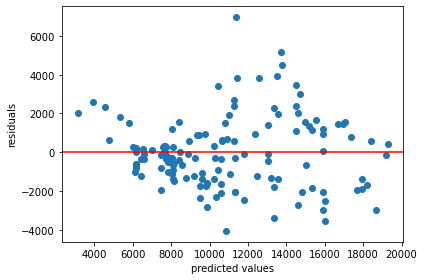

In [21]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

#### 3.) Run the model on the Test Data

In [22]:
df_cars_test['length'] = (df_cars_test['length'])**2
df_cars_test['HP'] = df_cars_test['HP']**2

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_cars_test_labels = df_cars_test['price'].copy()
df_cars_test.drop(columns=['price'],inplace=True)
df_cars_test_prepared = full_pipeline.fit_transform(df_cars_test)

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
Xtest = df_cars_test_prepared
ytest = df_cars_test_labels
Xtest = sm.add_constant(Xtest)

results = res.predict(Xtest)

In [25]:
predictions = pd.DataFrame(results,columns=['y_predict'])
Y_labels_preds = pd.concat([ytest, predictions])
df_y_ypred = ytest.reset_index()
df_y_ypred.drop(labels='index',inplace=True,axis=1)
df_y_ypred['y_predict'] = predictions
y_bar = df_y_ypred['price'].mean()
df_y_ypred['RS'] = (df_y_ypred['y_predict'] - df_y_ypred['price'])**2
df_y_ypred['TS'] = (df_y_ypred['y_predict'] - y_bar)**2
r_squared = 1 - (df_y_ypred['RS'].sum()/df_y_ypred['TS'].sum())
print('TSS:',df_y_ypred['TS'].sum())
print('RSS:', df_y_ypred['RS'].sum())
print('r_squared:', r_squared)

TSS: 574245310.9353869
RSS: 113853005.10906982
r_squared: 0.8017345497804502


#### 4.) Compare the predictions against the response

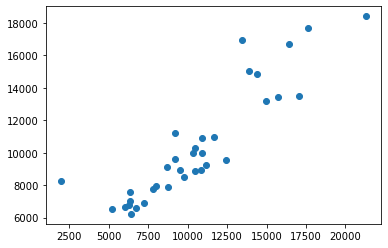

In [26]:
plt.scatter(df_y_ypred['y_predict'], df_y_ypred['price'])